In [1]:
#importing libraries for computation
import pandas as pd
import numpy as np

#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing the dataset
from sklearn.datasets import fetch_california_housing

#importing libraries for training,testing of model
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

Q2: Using the Scikit-Learn’s fetch_california_housing() function to download the California 
Housing Problem data. 

In [2]:
#loading the dataset into X and y
X,y=fetch_california_housing(return_X_y=True) #return_X_y help us to store the data as 'features' and 'target'

In [3]:
#Shape of X 
X.shape

(20640, 8)

In [4]:
#data type of X
X.dtype

dtype('float64')

In [5]:
#importing the standard scaler 
#Standard scaler-removes the mean and scales each feature/variable to unit variance
#Standard scaling is necessary because the range of attributes is very scattered
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#Applying the scaling operation to the dataset
X=scaler.fit_transform(X)

In [6]:
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Q3:Using the sequential API build a regression MLP ( to make predications. Model can have 1 
hidden layer with 30 units. Visualize the MSE for 20 epochs. Comment on overall accuracy.

In [7]:
#building the model

model1=tf.keras.models.Sequential()

#specifying the input shape
model1.add(tf.keras.Input(shape=(8,)))

#adding the layers
model1.add(tf.keras.layers.Dense(30, activation="relu"))
model1.add(tf.keras.layers.Dense(1, activation="linear"))

In [8]:
#Compiling the above model
opt=tf.keras.optimizers.Adam(learning_rate=0.001) #if learning rate is not specified, it takes the default value = 0.001
model1.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [9]:
#fitting the model
history_m1=model1.fit(X_train,y_train,validation_data=(X_train,y_train), validation_split=0.2,epochs=20, batch_size=32)

Epoch 1/20
362/362 [==============================] - 7s 7ms/step - loss: 2.4916 - root_mean_squared_error: 1.5785 - val_loss: 0.7558 - val_root_mean_squared_error: 0.8694
Epoch 2/20
362/362 [==============================] - 2s 5ms/step - loss: 0.6504 - root_mean_squared_error: 0.8065 - val_loss: 0.5327 - val_root_mean_squared_error: 0.7299
Epoch 3/20
362/362 [==============================] - 2s 6ms/step - loss: 0.5109 - root_mean_squared_error: 0.7148 - val_loss: 0.4374 - val_root_mean_squared_error: 0.6614
Epoch 4/20
362/362 [==============================] - 2s 7ms/step - loss: 0.4514 - root_mean_squared_error: 0.6719 - val_loss: 0.4033 - val_root_mean_squared_error: 0.6351
Epoch 5/20
362/362 [==============================] - 1s 4ms/step - loss: 0.4235 - root_mean_squared_error: 0.6508 - val_loss: 0.3911 - val_root_mean_squared_error: 0.6254
Epoch 6/20
362/362 [==============================] - 1s 4ms/step - loss: 0.4080 - root_mean_squared_error: 0.6388 - val_loss: 0.3787 - val_

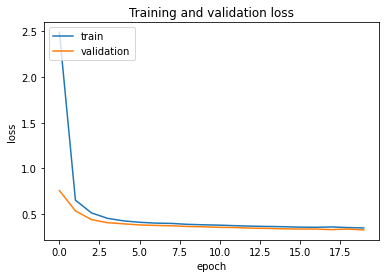

In [10]:
#visualizing the training vs validation loss
loss=history_m1.history['loss']
val_loss=history_m1.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

Inference: Both the losses are decreasing. Training loss first has a steep downward slope then it gradually becomes stable. Similiarly, for the validation loss it drops down and then stabilizes. Also both the graphs are near to each other. Hence we can conclude that it is a good model.

Q4:Using functional API build the following Wide & Deep Neural Network with the following 
architecture.

In [11]:
#specifying the inputs for the two paths
input1=keras.Input((5,),name="Input_Layer_1")  #wide path
input2=keras.Input((6,),name="Input_Layer_2")

#deep path
hidden_1=keras.layers.Dense(30,activation="relu",name="Hidden_Layer_1",kernel_regularizer="l2")(input2) #we were getting an overfitted model,hence introduced regularization
hidden_2=keras.layers.Dense(30,activation="relu",name="Hidden_Layer_2")(hidden_1)

#concatenation of the hidden_layer_2 and input_layer_1
concat=keras.layers.concatenate([hidden_2,input1])

#final output layer
output=keras.layers.Dense(1,activation=None,name="Output_Layer",kernel_regularizer="l2")(concat)

In [12]:
#building the model
func_model=keras.Model(inputs=[input1,input2],outputs=[output])

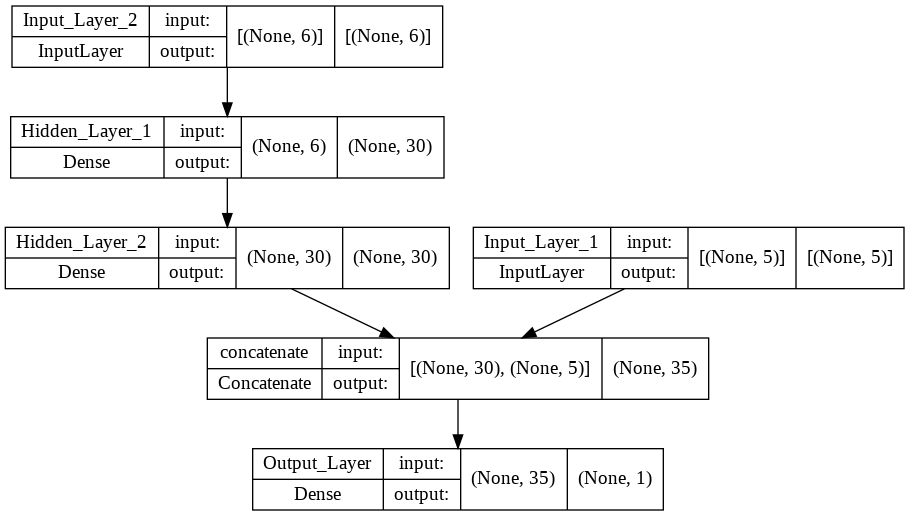

In [13]:
#Visualize the model as a graph
keras.utils.plot_model(func_model,show_shapes=True)

In [14]:
#compiling the above model
func_model.compile(loss="mse",optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=[keras.metrics.RootMeanSquaredError()])

In [15]:
#np.hsplit help us to horizontally split the dataset
x1=np.hsplit(X,np.array([5,8]))[0] 
x2=np.hsplit(X,np.array([2,8]))[1]
print(x1.shape)
print(x2.shape)

(20640, 5)
(20640, 6)


In [16]:
#fitting the model
history_m2=func_model.fit([x1,x2],y,epochs=20,batch_size=32,validation_split=0.15)

Epoch 1/20
549/549 [==============================] - 3s 4ms/step - loss: 1.1107 - root_mean_squared_error: 0.9987 - val_loss: 0.4819 - val_root_mean_squared_error: 0.6089
Epoch 2/20
549/549 [==============================] - 2s 3ms/step - loss: 0.5825 - root_mean_squared_error: 0.6894 - val_loss: 0.4471 - val_root_mean_squared_error: 0.5880
Epoch 3/20
549/549 [==============================] - 2s 3ms/step - loss: 0.5369 - root_mean_squared_error: 0.6643 - val_loss: 0.4427 - val_root_mean_squared_error: 0.5941
Epoch 4/20
549/549 [==============================] - 2s 3ms/step - loss: 0.5151 - root_mean_squared_error: 0.6553 - val_loss: 0.4233 - val_root_mean_squared_error: 0.5841
Epoch 5/20
549/549 [==============================] - 2s 4ms/step - loss: 0.4961 - root_mean_squared_error: 0.6453 - val_loss: 0.4375 - val_root_mean_squared_error: 0.6008
Epoch 6/20
549/549 [==============================] - 2s 3ms/step - loss: 0.4775 - root_mean_squared_error: 0.6342 - val_loss: 0.4285 - val_

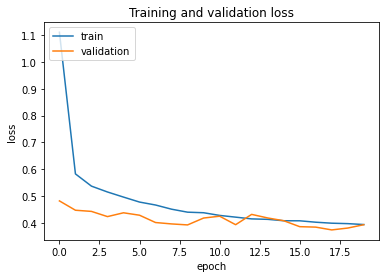

In [17]:
#visualizing the training vs validation loss
loss=history_m2.history['loss']
val_loss=history_m2.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

Inference: This graph is also showing similar trends as the above graph. But there is a slight differnce as both the curves are not very close to each other and the validation loss curve is a bit unstabilized.
But considering the rmse values we can conclude that this model can also be considered as a good model.
